<a href="https://colab.research.google.com/github/indahgala/INDAHGP_09011182126033_KEL-3_MPI-BUBBLESHORT/blob/main/INDAHGALAPUTRI_PML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PREDIKSI PEMBELI ASURANSI MOBIL**

  **NAMA : INDAH GALA PUTRI<br>NIM  : 09011182126033<br>KELAS : SK 6 A**


  pada projek ini saya memilih topik supervised learning diamana saya akan mealakukan prediksi dari pelanggan yang dihubungi untuk mengikuti kampanye yang diselenggarakan oleh bank di Amerika Selatan, apakah mereka akan membeli asuransi mobil atau tidak. adapun pada projek ini saya menggunakan dataset Car Insurance Cold Calls. dataset ini merupakan data dari salah satu bank di Amerika Serikat. dimana dataset ini berisi tentang informasi klien seperti usia, pekerjaan, dll. serta informasi yang lebih spesifik tentang kampanye penjualan asuransi saat ini seperti communication, last contact day dan kampanye sebelumnya seperti previous attempts, outcome. kemudian model yang saya gunakan untuk melakukan prediksi adalah Logistic Regression.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/indahPML/car_train.csv')
df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


### **1. ANALISIS EKSPLORASI** **DATASET**

In [ ]:
print("Dataset Shape (row, col): {}".format(df.shape))

Dataset Shape (row, col): (4000, 19)


Disana terlihat bahwa pada dataset yang saya gunakan terdapat 4000 baris dan 19 kolom pada dataset

In [ ]:
df.drop("Id", axis=1, inplace=True)

kolom “Id” dihapus karena tidak relevan untuk analisis atau pemodelan yang akan dibuat.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               4000 non-null   int64 
 1   Job               3981 non-null   object
 2   Marital           4000 non-null   object
 3   Education         3831 non-null   object
 4   Default           4000 non-null   int64 
 5   Balance           4000 non-null   int64 
 6   HHInsurance       4000 non-null   int64 
 7   CarLoan           4000 non-null   int64 
 8   Communication     3098 non-null   object
 9   LastContactDay    4000 non-null   int64 
 10  LastContactMonth  4000 non-null   object
 11  NoOfContacts      4000 non-null   int64 
 12  DaysPassed        4000 non-null   int64 
 13  PrevAttempts      4000 non-null   int64 
 14  Outcome           958 non-null    object
 15  CallStart         4000 non-null   object
 16  CallEnd           4000 non-null   object
 17  CarInsurance  

Terdapat beberapa kolom dengan tipe data yang berbeda:
* int64 untuk data numerik : Tipe data untuk kolom-kolom seperti 'Age', 'Default', 'Balance', dll.
* object untuk tipe data categorical : Tipe data untuk kolom-kolom seperti 'Job', 'Marital', 'Education', dll.

Beberapa kolom memiliki nilai yang hilang, contohnya, kolom 'Job' memiliki 3981 nilai non-null, dan kolom 'Outcome' hanya memiliki 958 nilai non-null. Hal ini menunjukkan keberadaan nilai yang hilang dalam data.

Adapun berikut ini penjelsan dari kolom-kolom yang ada :
* 'Age': Umur calon pelanggan asuransi.
* 'Job': Pekerjaan calon pelanggan.
* 'Marital': Status pernikahan calon pelanggan.
*  'Education': Tingkat pendidikan calon pelanggan.
* 'Default' : berisi informasi tentang apakah klien memiliki kredit dalam kondisi default atau tidak.(binary)
* 'Balance' : rata-rata saldo tahunan dalam mata uang Amerika Serikat (USD)  
* 'HHInsurance': Status asuransi rumah tangga (binary).
* 'CarLoan': apakah klien tersebut memiliki pinjaman mobil atau tidak
* 'Communication' : jenis komunikasi yang digunakan.  
* 'LastContactDay' : Tanggal  terakhir kontak dilakukan dengan klien
* 'LastContactMonth : bulan terkahir kontak dengan klien
* 'NoOfContacts : seberapa sering kontak dengan klien dilakukan
* 'DaysPassed : jumlah hari yang telah berlalu sejak kontak terakhir.
* 'PrevAttempts : jumlah upaya kontak sebelumnya yang telah dilakukan sebelum kampanye ini dimulai.  
* 'CarInsurance': Status asuransi mobil (target yang ingin diprediksi, binary).
* 'CallStart' dan 'CallEnd' mungkin berisi informasi tentang waktu panggilan.
* 'Outcome' berisi keputusan pelanggan terkait penawaran asuransi.


In [ ]:
df.describe()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


disini kita dapat melihat ringkasan statistik deskriptif dari data seperti :
* Count: Jumlah entri atau pengamatan non-null dalam kolom.
* Mean: Rata-rata nilai dalam kolom.
* Std (Standard Deviation): Deviasi standar, mengukur seberapa tersebar nilai-nilai di sekitar rata-rata.
* Min: Nilai minimum dalam kolom.
* 25% (Q1): Kuartil pertama, nilai yang membagi 25% data terendah.
* 50% (Median): Nilai tengah atau median, membagi data menjadi dua bagian setara.
* 75% (Q3): Kuartil ketiga, nilai yang membagi 75% data terendah.
* Max: Nilai maksimum dalam kolom.

In [ ]:
#list of all the categoric columns
cat = df.select_dtypes('object').columns.to_list()
for col in cat[:6]:
    print(col,"\n",df[col].value_counts()/df.shape[0],"\n\n")

Job 
 management       0.22325
blue-collar      0.18975
technician       0.16500
admin.           0.11475
services         0.08250
retired          0.06225
self-employed    0.03500
student          0.03275
unemployed       0.03250
entrepreneur     0.03025
housemaid        0.02725
Name: Job, dtype: float64 


Marital 
 married     0.57600
single      0.30325
divorced    0.12075
Name: Marital, dtype: float64 


Education 
 secondary    0.49700
tertiary     0.32050
primary      0.14025
Name: Education, dtype: float64 


Communication 
 cellular     0.70775
telephone    0.06675
Name: Communication, dtype: float64 


LastContactMonth 
 may    0.26225
jul    0.14325
aug    0.13400
jun    0.11350
nov    0.08675
apr    0.07650
feb    0.06550
jan    0.03350
oct    0.02950
sep    0.02525
mar    0.01975
dec    0.01025
Name: LastContactMonth, dtype: float64 


Outcome 
 failure    0.10925
success    0.08150
other      0.04875
Name: Outcome, dtype: float64 




* Pada hasil diatas terlihat bahwa kebanyakan costumer bekerja di bidang management, mereka telah menikah, memiliki pendidikan tingkat secondary, dan menggunakan telepon cellular untuk berkomunikasi.
* untuk hasil kampanye pemasaran sebelumnya kebanyakan gagal.
* costumer paling banyak dihubungi pada bulan may

#### **Visualisasi data categorical**

0    2396
1    1604
Name: CarInsurance, dtype: int64


<ipython-input-9-de743048d069>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="CarInsurance" , data=df ,palette='rocket_r')


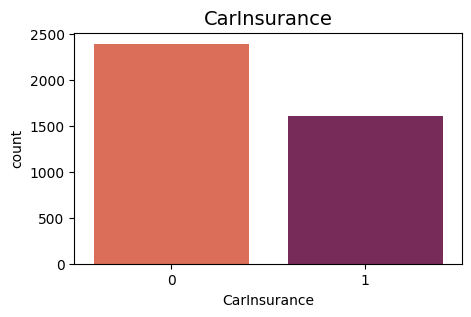

In [ ]:
print(df["CarInsurance"].value_counts())
total = float(len(df["CarInsurance"]))
plt.figure(figsize=(5,3))
sns.countplot(x="CarInsurance" , data=df ,palette='rocket_r')
plt.title("CarInsurance", fontsize=14)
plt.show()

terlihat bahwah klien paling banyak belum memiliki asuransi mobil. diamana yang memiliki asuransi mobil adalah sebanyak 1604 dan yang tidak punya asuransi mobil sebanyak 2396 orang

<ipython-input-10-a8740eb0b30a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Outcome" , data=df ,palette='rocket_r')


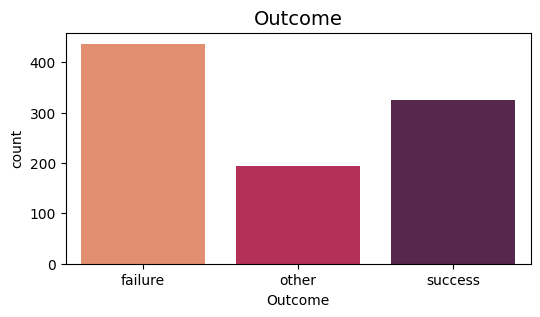

% of total:
failure    10.92
success     8.15
other       4.88
Name: Outcome, dtype: float64


In [ ]:
plt.figure(figsize=(6,3))
sns.countplot(x="Outcome" , data=df ,palette='rocket_r')
plt.title("Outcome", fontsize=14)
plt.show()
print("% of total:")
print(round((df["Outcome"].value_counts()/df.shape[0]),4)*100)



pada plot diatas dapat diketahu bahwa kebanyakan penawaran yang dilakukan kepada klien berakhir gagal(failure). adapun paling sedikt adalah other, berarti klien yang dihubungi pada penawaran sebelumnya kebanyakan belum menjawab secara signifikan

<ipython-input-11-08313a5be3c6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Job" , data=df ,palette='viridis_r')


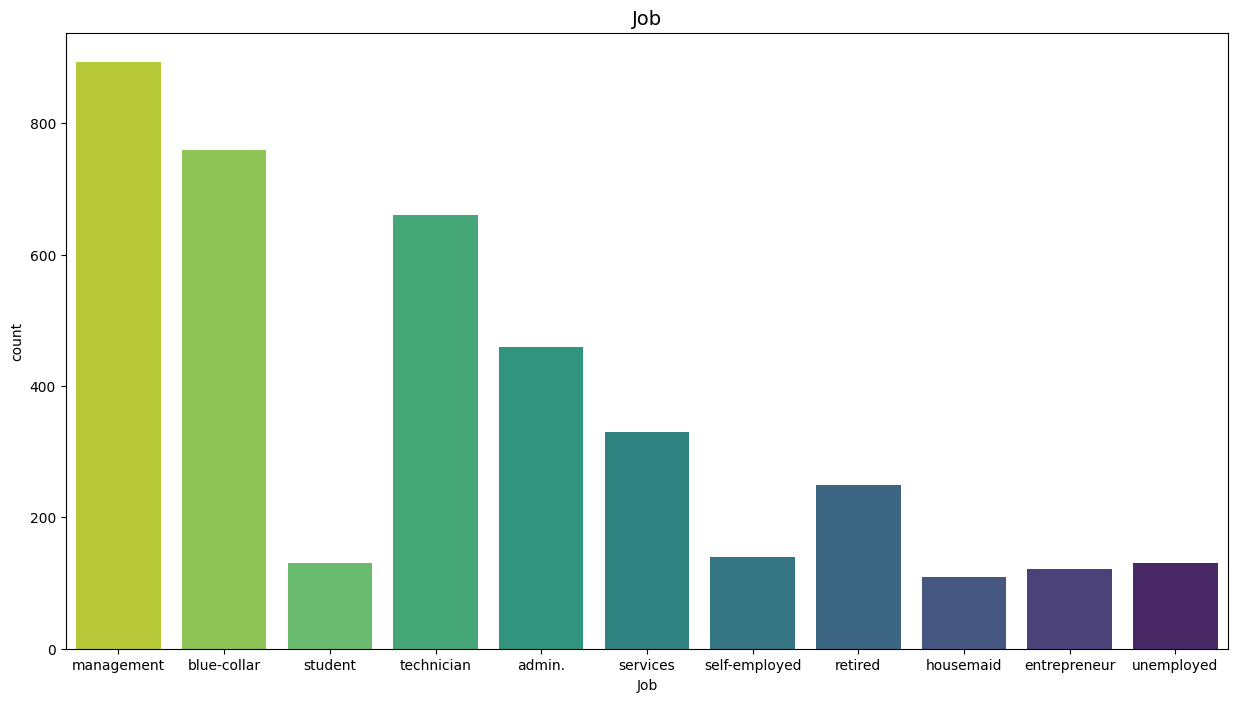

% of total:
management       22.32
blue-collar      18.98
technician       16.50
admin.           11.48
services          8.25
retired           6.22
self-employed     3.50
student           3.28
unemployed        3.25
entrepreneur      3.02
housemaid         2.72
Name: Job, dtype: float64


In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x="Job" , data=df ,palette='viridis_r')
plt.title("Job", fontsize=14)
plt.show()
print("% of total:")
print(round((df["Job"].value_counts()/df.shape[0]),4)*100)

dari plot diatas dapat diketahui bahwa klien paling banyak bekerja sebagai management dan paling sedikit bekerja sebagai haousemaid.

<ipython-input-12-6c1a505fc9a0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Marital" , data=df ,palette='rocket')


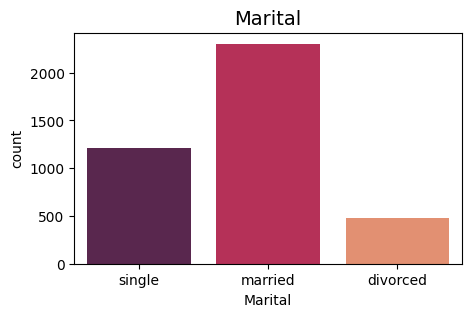

% of total:
married     57.60
single      30.32
divorced    12.08
Name: Marital, dtype: float64


In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(x="Marital" , data=df ,palette='rocket')
plt.title("Marital", fontsize=14)
plt.show()
print("% of total:")
print(round((df["Marital"].value_counts()/df.shape[0]),4)*100)

pada plot tesebut, paling banyak klien telah berstatus menikah dan paling sedikit berstatus bercerai.

<ipython-input-13-3995762ff3ac>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Education" , data=df ,palette='nipy_spectral')


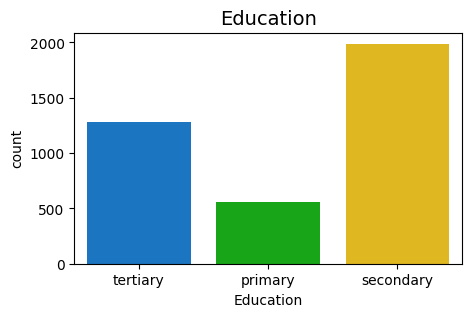

% of total:
secondary    49.70
tertiary     32.05
primary      14.03
Name: Education, dtype: float64


In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(x="Education" , data=df ,palette='nipy_spectral')
plt.title("Education", fontsize=14)
plt.show()
print("% of total:")
print(round((df["Education"].value_counts()/df.shape[0]),4)*100)

berdasarkan plot tersebut dapat diketahui klien yang dihubungi paling banyak mempunyai pendidikan secondary (menengah) dan paling sedikit pendidikan primary (dasar)

<ipython-input-14-dc127e35b288>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Default" , data=df ,palette='CMRmap')


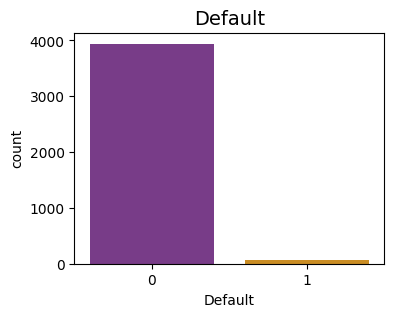

% of total:
0    98.55
1     1.45
Name: Default, dtype: float64


In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x="Default" , data=df ,palette='CMRmap')
plt.title("Default", fontsize=14)
plt.show()
print("% of total:")
print(round((df["Default"].value_counts()/df.shape[0]),4)*100)

dari plot diatas terlihat bahwa klien yang dihubungi 98,55% tidak mempuunyai kredit atau hutang.

<ipython-input-15-3d06650106aa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="HHInsurance" , data=df ,palette='rainbow')


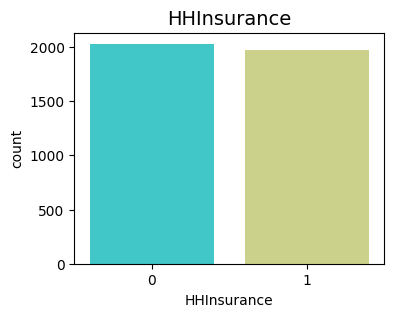

% of total:
0    50.72
1    49.28
Name: HHInsurance, dtype: float64


In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x="HHInsurance" , data=df ,palette='rainbow')
plt.title("HHInsurance", fontsize=14)
plt.show()
print("% of total:")
print(round((df["HHInsurance"].value_counts()/df.shape[0]),4)*100)

terlihat bahwa klien yang dihubungi kebanyakan tidak mempunyai asuransi rumah.

<ipython-input-16-077a4b64452e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="CarLoan" , data=df ,palette='rocket')


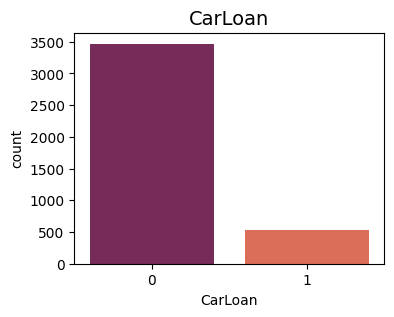

% of total:
0    86.7
1    13.3
Name: CarLoan, dtype: float64


In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x="CarLoan" , data=df ,palette='rocket')
plt.title("CarLoan", fontsize=14)
plt.show()
print("% of total:")
print(round((df["CarLoan"].value_counts()/df.shape[0]),4)*100)

dari plot diatas dapat diketahui kebanyakan klien yang yang dihubungi tidak memiliki kredit mobil.

<ipython-input-17-87fe7ac85459>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Communication" , data=df ,palette='cubehelix')


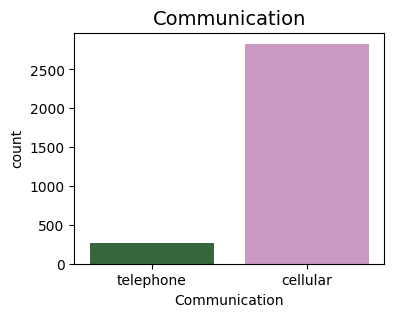

% of total:
cellular     70.78
telephone     6.68
Name: Communication, dtype: float64


In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x="Communication" , data=df ,palette='cubehelix')
plt.title("Communication", fontsize=14)
plt.show()
print("% of total:")
print(round((df["Communication"].value_counts()/df.shape[0]),4)*100)

dari plot diatas dapat diketahui bahwa jenis media komunikasi yang digunakan olrh klien adalah cellular

<ipython-input-18-3161412ddd26>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="LastContactDay" , data=df ,palette='icefire')


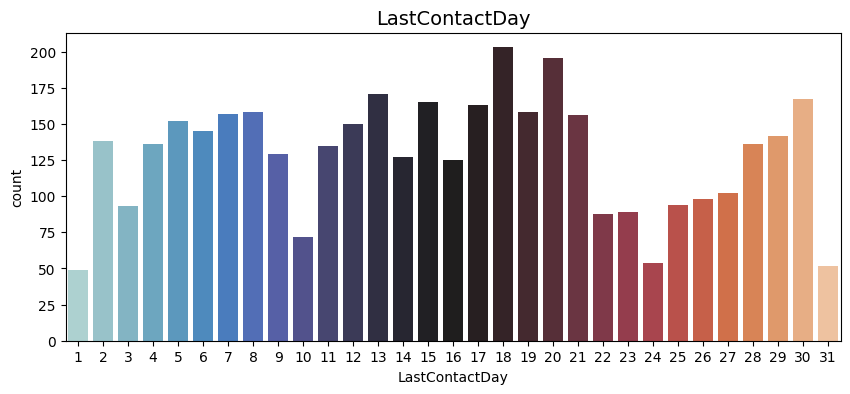

% of total:
18    5.08
20    4.90
13    4.28
30    4.18
15    4.12
17    4.08
19    3.95
8     3.95
7     3.92
21    3.90
5     3.80
12    3.75
6     3.62
29    3.55
2     3.45
4     3.40
28    3.40
11    3.38
9     3.22
14    3.18
16    3.12
27    2.55
26    2.45
25    2.35
3     2.32
23    2.22
22    2.20
10    1.80
24    1.35
31    1.30
1     1.22
Name: LastContactDay, dtype: float64


In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x="LastContactDay" , data=df ,palette='icefire')
plt.title("LastContactDay", fontsize=14)
plt.show()
print("% of total:")
print(round((df["LastContactDay"].value_counts()/df.shape[0]),4)*100)

terlihat bahwa klien paling sering dikontak pada tanggal 18 yaitu sebanyak 5,08% dan paling sedikit pada tanggal 1.

<ipython-input-19-af880e47f4a2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="LastContactMonth" , data=df ,palette='icefire')


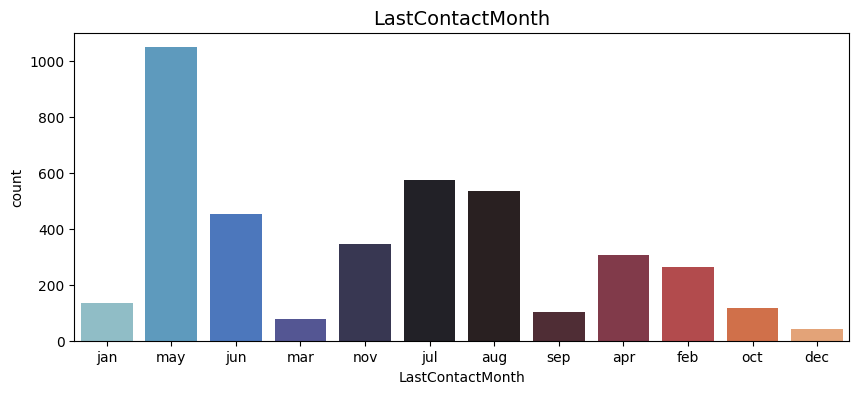

% of total:
may    26.22
jul    14.32
aug    13.40
jun    11.35
nov     8.67
apr     7.65
feb     6.55
jan     3.35
oct     2.95
sep     2.53
mar     1.98
dec     1.02
Name: LastContactMonth, dtype: float64


In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x="LastContactMonth" , data=df ,palette='icefire')
plt.title("LastContactMonth", fontsize=14)
plt.show()
print("% of total:")
print(round((df["LastContactMonth"].value_counts()/df.shape[0]),4)*100)

terlihat bahwa klien paling banyak dihubungi pada bulan may dan paling sedikit pada bulan desember

#### **Visualisasi data numeric**

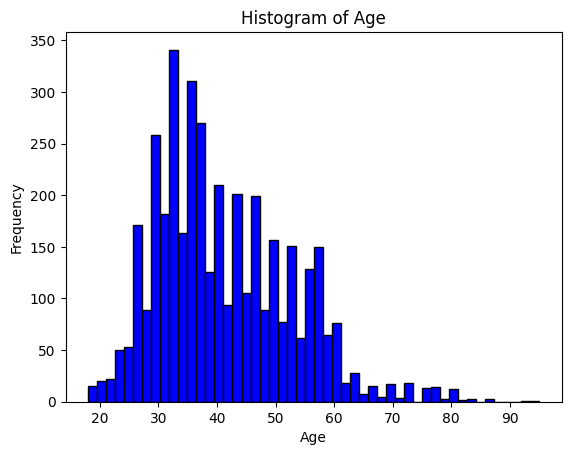

In [ ]:
plt.hist(df['Age'], bins=50, color='blue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

pada histogram tersebut terlihat bahwa umur klien rata-rata paling banyak berada pada usia 30an dengan frekuensi 340

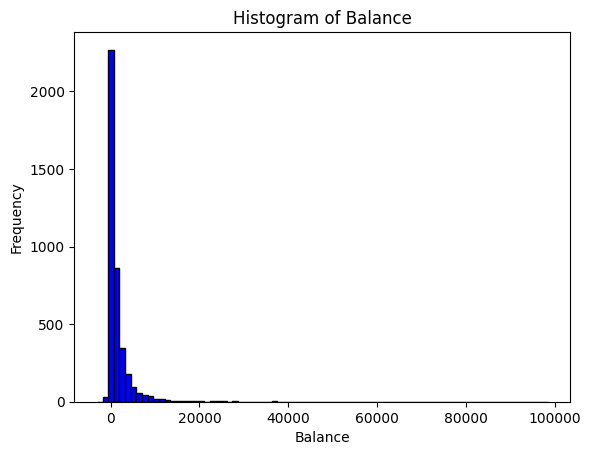

In [ ]:
plt.hist(df['Balance'], bins=80, color='blue', edgecolor='black')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Histogram of Balance')
plt.show()

disini terlihat bahwa balance (saldo) klient kebanyakan <20000 USD dan kemungkinan disini terdapat outlier

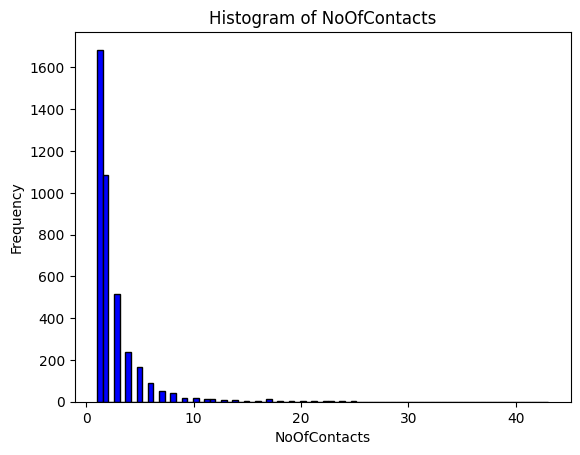

In [ ]:
plt.hist(df['NoOfContacts'], bins=80, color='blue', edgecolor='black')
plt.xlabel('NoOfContacts')
plt.ylabel('Frequency')
plt.title('Histogram of NoOfContacts')
plt.show()

disini terlihat bahwa kontak dengan klien paling sering dilakukan sebanyak 1 kali dengan frekuensi sebesar >1600

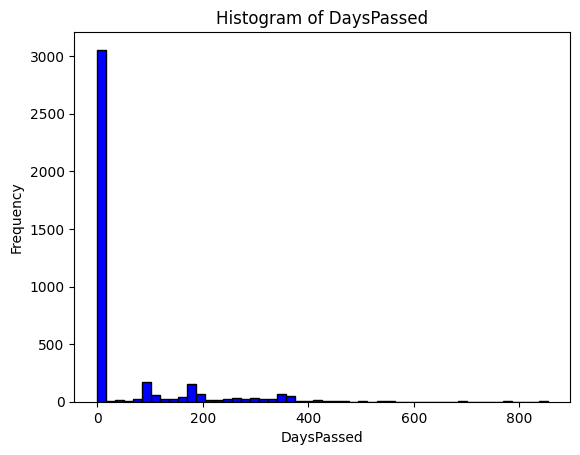

In [ ]:
plt.hist(df['DaysPassed'], bins=50, color='blue', edgecolor='black')
plt.xlabel('DaysPassed')
plt.ylabel('Frequency')
plt.title('Histogram of DaysPassed')
plt.show()

disini terlihat bahwa hari yang berlalu sejak panggilan terakhir paling banyak selama <100 hari.

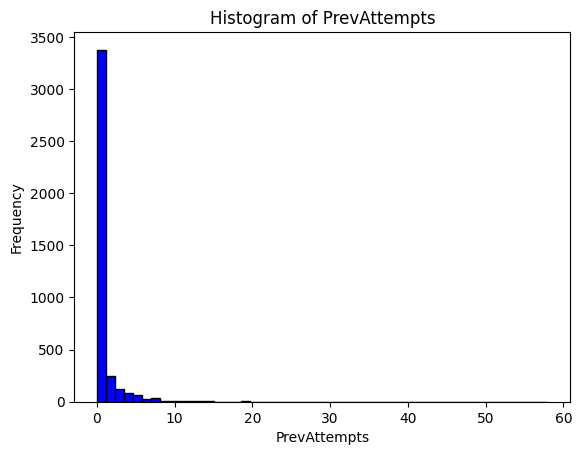

In [ ]:
plt.hist(df['PrevAttempts'], bins=50, color='blue', edgecolor='black')
plt.xlabel('PrevAttempts')
plt.ylabel('Frequency')
plt.title('Histogram of PrevAttempts')
plt.show()

disini terlihat jumlah upaya kontak yang dilakukan paling banyak dilakukan sekitar 1 kali dengan frekuensi >3000.

### **2. DATA PREPOCESSING**

#### **Outlier**

<ipython-input-25-63479b40b478>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat,palette='Blues')
<ipython-input-25-63479b40b478>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat,palette='Blues')
<ipython-input-25-63479b40b478>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat,palette='Blues')
<ipython-input-25-63479b40b478>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same

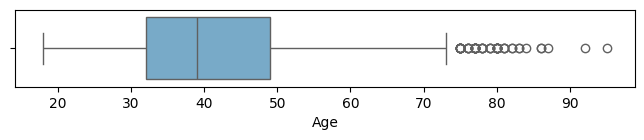

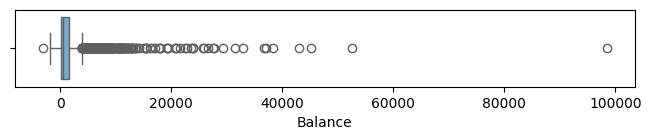

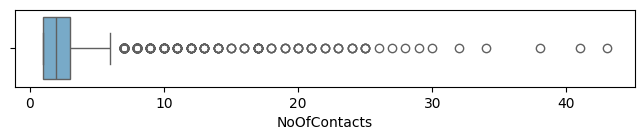

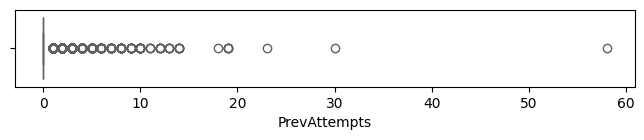

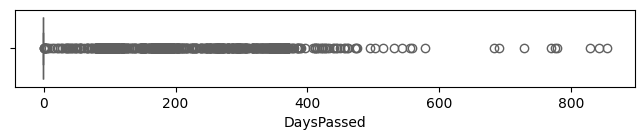

In [ ]:
for cat in ['Age','Balance','NoOfContacts','PrevAttempts','DaysPassed']:
    plt.figure(figsize=(8,1))
    sns.boxplot(data=df, x=cat,palette='Blues')


berdasarkan boxplot diatas, terlihat tardapat nilai ekstrem atau outlier pada variabel 'Age' dan 'Balance'. maka kita perlu menghandle outlier ini



In [ ]:
for cat in ['Age','Balance']:
    Q3, Q1 = np.percentile(df[cat], [75, 25])
    print('___________________________________________________')
    print(cat)
    print('___________________________________________________')
    print('Q1=',Q1)
    print('Q3=',Q3)
    IQR = Q3 - Q1
    print('IQR:',IQR)
    print('Interval:[', df[cat].mean() - 3*IQR,'&',df[cat].mean() + 3*IQR,']')
    print('min=',df[cat].min())
    print('max=',df[cat].max())

    n=((df[cat]>= (df[cat].mean() + 3*IQR)).sum())
    m=((df[cat]<= (df[cat].mean() - 3)).sum())
    print('pecentage of outliers(max):',n/df.shape[0])
    print('pecentage of outliers(min):',m/df.shape[0])

___________________________________________________
Age
___________________________________________________
Q1= 32.0
Q3= 49.0
IQR: 17.0
Interval:[ -9.785249999999998 & 92.21475000000001 ]
min= 18
max= 95
pecentage of outliers(max): 0.00025
pecentage of outliers(min): 0.48625
___________________________________________________
Balance
___________________________________________________
Q1= 111.0
Q3= 1619.0
IQR: 1508.0
Interval:[ -2991.06275 & 6056.93725 ]
min= -3058
max= 98417
pecentage of outliers(max): 0.05225
pecentage of outliers(min): 0.74075


* berdasarkan hasil diatas terlihat bahwa klien yang lebih tua dari 92 tahun dianggap sebagai outlier. maka klien yang umurnya lebih tua dari 92 tahun akan dihapus.
* data rata-rata saldo tahunan cenderung condong karena terdapat banyak nilai ekstrim. Oleh karena itu, kita akan menghapus nilai-nilai yang tidak termasuk dalam interval ini -2991 sampai 6056.


In [ ]:
df_rmout=df

df_rmout=df_rmout[(df_rmout.Age < 92)]
percentage_rm=(df.shape[0]-df_rmout.shape[0])/df.shape[0]
print('the percentage of removed data:',(percentage_rm*100))

df_rmout2=df_rmout
df_rmout2=df_rmout2[(df_rmout2.Balance <= 6056.93725)&(df_rmout2.Balance > -2991.06275)]
percentage_rm=(df.shape[0]-df_rmout2.shape[0])/df.shape[0]
print('the percentage of removed data:',(percentage_rm*100))


df_rmout=df_rmout[(df_rmout.Balance <df_rmout.Balance.max())&(df_rmout.Balance>df_rmout.Balance.min() )]
df_rmout.shape
trdf=df_rmout

the percentage of removed data: 0.05
the percentage of removed data: 5.3


setelah dilakukan handling outlier, maka data age terdapat 0,05% dihapus karena memiliki outlier. dan untuk data balance sebanyak 5,3%.


<ipython-input-28-778955e691d8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_rmout, x=cat,palette='Blues')
<ipython-input-28-778955e691d8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_rmout, x=cat,palette='Blues')


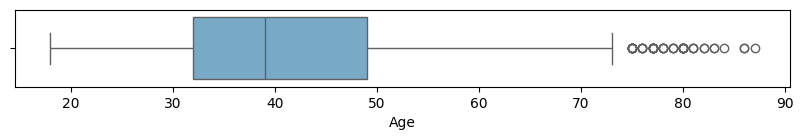

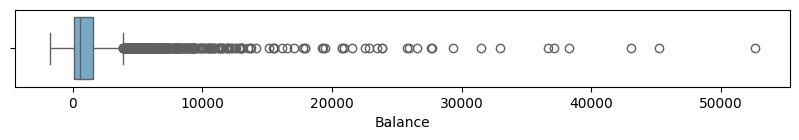

In [ ]:
for cat in ['Age','Balance']:
    plt.figure(figsize=(10,1))
    sns.boxplot(data=df_rmout, x=cat,palette='Blues')

dari plot diatas terlihat setelah dilakukan penghapusan missing value maka pada data 'Age' dan 'balance' tidak terdapat outlier lagi.

#### **Mengubah tipe data pada atribut CallStart dan CallEnd menjadi datetime**

In [ ]:
import datetime as dt
df['CallStart'] = pd.to_datetime(df['CallStart'])
df['CallEnd'] = pd.to_datetime(df['CallEnd'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Age               4000 non-null   int64         
 1   Job               3981 non-null   object        
 2   Marital           4000 non-null   object        
 3   Education         3831 non-null   object        
 4   Default           4000 non-null   int64         
 5   Balance           4000 non-null   int64         
 6   HHInsurance       4000 non-null   int64         
 7   CarLoan           4000 non-null   int64         
 8   Communication     3098 non-null   object        
 9   LastContactDay    4000 non-null   int64         
 10  LastContactMonth  4000 non-null   object        
 11  NoOfContacts      4000 non-null   int64         
 12  DaysPassed        4000 non-null   int64         
 13  PrevAttempts      4000 non-null   int64         
 14  Outcome           958 no

Terlihat bahwa tipe data pada CallStart dan CallEnd telah berubah menjadi datetime

#### **Membuat kolom baru bernama "call_time"**

In [ ]:
df["call_time"] = df["CallEnd"]  - df["CallStart"]
df["call_time"] = df["call_time"].dt.components["minutes"]*60 + df["call_time"].dt.components["seconds"]
df.head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance,call_time
0,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,2024-03-28 13:45:20,2024-03-28 13:46:30,0,70
1,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,2024-03-28 14:49:03,2024-03-28 14:52:08,0,185
2,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,2024-03-28 16:30:24,2024-03-28 16:36:04,1,340
3,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,2024-03-28 12:06:43,2024-03-28 12:20:22,1,819
4,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,2024-03-28 14:35:44,2024-03-28 14:38:56,0,192


pada data diatas terlihat bahwa kolom baru dengan nama 'call_time' telah ditambahkan. dimana kolom ini berfungsi unutk melihat selisih antara 'CallStart' dan 'CallEnd' sehingga dapat diketahui berapa lama panggilan berlangsung.


In [ ]:
print(df.call_time.describe())

count    4000.000000
mean      350.844000
std       342.236576
min         5.000000
25%       126.000000
50%       232.000000
75%       460.000000
max      3253.000000
Name: call_time, dtype: float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Age               4000 non-null   int64         
 1   Job               3981 non-null   object        
 2   Marital           4000 non-null   object        
 3   Education         3831 non-null   object        
 4   Default           4000 non-null   int64         
 5   Balance           4000 non-null   int64         
 6   HHInsurance       4000 non-null   int64         
 7   CarLoan           4000 non-null   int64         
 8   Communication     3098 non-null   object        
 9   LastContactDay    4000 non-null   int64         
 10  LastContactMonth  4000 non-null   object        
 11  NoOfContacts      4000 non-null   int64         
 12  DaysPassed        4000 non-null   int64         
 13  PrevAttempts      4000 non-null   int64         
 14  Outcome           958 no

In [ ]:
df.drop(columns=['CallStart', 'CallEnd'], inplace=True)

#### **Missing Value**

In [ ]:
df.isnull().sum()

Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CarInsurance           0
call_time              0
dtype: int64

terdapat missing value pada atribut job,education, communication, dan outcome

In [ ]:
null_cols = ["Job","Education", "Communication", "Outcome"]
for col in null_cols[:3]:
    df[col] = df[col].fillna(df[col].dropna().mode().values[0])

pada kode diatas nilai NaN dari 3 kolom pertama yaitu kolom job, education, dan communication diganti dengan nilai modus.

In [ ]:
df["Outcome"] = df["Outcome"].fillna("no prevoius contact")

berdasrkan kode diatas, jika ada baris dalam kolom "Outcome" yang memiliki nilai yang hilang (NaN), nilai tersebut akan diganti dengan string "no prevoius contact"

In [ ]:
df.isnull().sum()

Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
Outcome             0
CarInsurance        0
call_time           0
dtype: int64

terlihat bahwa pada dataframe tidak terdapat missing value lagi.

#### **Mengubah Variabel Categorical ke Numeric**

In [ ]:
df = pd.get_dummies(df, columns=['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth', 'Outcome'])

### **3. PEMILIHAN MODEL**

pada projek kali ini, karena akan melakukan prediksi pembeli asuransi mobil yang mana hal tersebut masuk ke dalam survived learning maka untuk membangun model prediksi saya memilih model "Logistic Regression". hal ini karena model logistic regression relatif sederhana dan mudah dipahami. selain itu, logistic regression adalah pilihan yang baik karena secara alami menghasilkan output dalam bentuk probabilitas, yang dimana di sini saya akan memprediksi probabilitas bahwa seorang pelanggan akan membeli asuransi mobil berdasarkan riwayat pembelian sebelumnya, preferensi, dan faktor-faktor lainnya.


#### **Flowchart Alur**

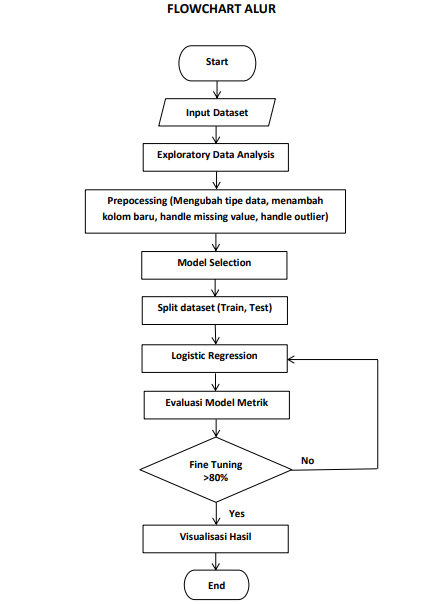

#### **Arsitektur Logistic Regression**

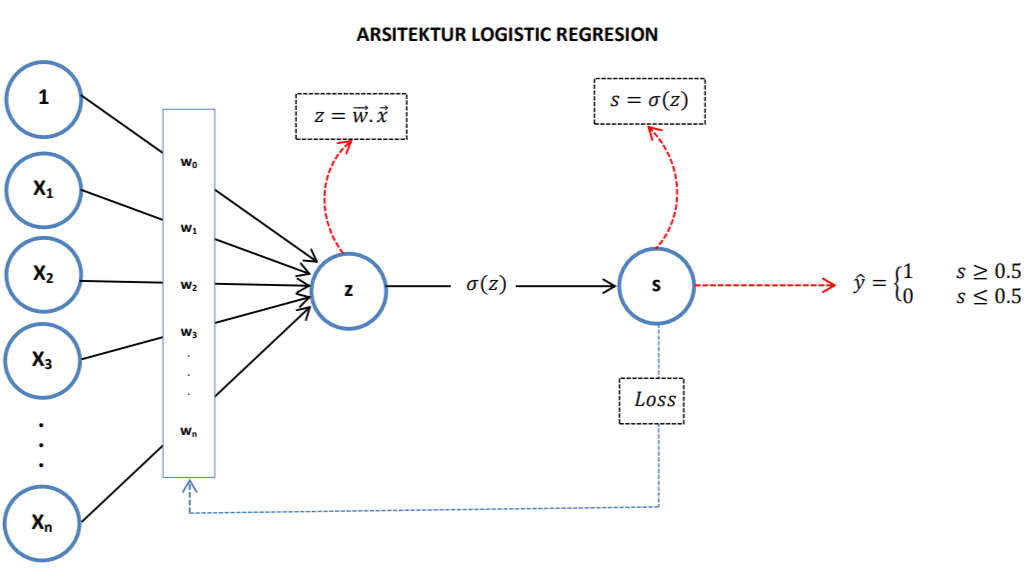

1. Akurasi (Accuracy): Untuk data train, akurasi adalah sekitar 0.817 atau 81.7%, sedangkan untuk data test, akurasi adalah sekitar 0.812 atau 81.2%. Ini menunjukkan bahwa model memiliki tingkat keakuratan yang cukup tinggi dalam memprediksi kelas target pada kedua data train dan test.

2. Presisi (Precision): Untuk data train, presisi adalah sekitar 0.807 atau 80.7%, sedangkan untuk data test, presisi adalah sekitar 0.797 atau 79.7%. Ini menunjukkan bahwa dari semua prediksi positif yang dibuat oleh model, sekitar 80.7% (data train) dan 79.7% (data test) adalah benar.

3. Recall: Untuk data train, recall adalah sekitar 0.715 atau 71.5%, sedangkan untuk data test, recall adalah sekitar 0.714 atau 71.4%. Recall mengukur kemampuan model dalam mengidentifikasi secara benar semua kasus positif yang ada.

4. Skor F1 (F1 Score): F1 score merupakan ukuran rata-rata harmonik antara presisi dan recall. Untuk data train, skor F1 adalah sekitar 0.758, sedangkan untuk data test, skor F1 adalah sekitar 0.753. Skor F1 yang lebih tinggi menunjukkan bahwa model memiliki keseimbangan yang baik antara presisi dan recall.
5. Mean Squared Error (MSE) memiliki nilai sebesar 0.188. Nilai MSE yang kecil menunjukkan bahwa model memiliki tingkat kesalahan yang rendah dalam memprediksi nilai target pada masalah regresi.

Berdasarkan metrik evaluasi yang diberikan, tidak ada indikasi yang jelas tentang adanya overfitting. Perbedaan antara performa model pada data latih dan data uji relatif kecil, menunjukkan bahwa model cenderung dapat menggeneralisasi dengan baik pada data yang belum pernah dilihat sebelumnya.

### **4. SPLIT DATASET (TRAIN & TEST)**

In [ ]:
from sklearn.model_selection import train_test_split

# Memisahkan data menjadi data train (75%) dan data test (25%)
y = df['CarInsurance']
X = df.drop('CarInsurance', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

disini saya mengambil kolom 'CarInsurance' dari Dataset sebagai label atau target (y). kemudian mengambil seluruh kolom dari dataset kecuali kolom 'CarInsurance' sebagai fitur (X). Fitur-fitur ini akan digunakan untuk melakukan prediksi terhadap target. selanjutnya mengatur proporsi data train sebesar 75% dari total dataset, sehingga data test akan menjadi 25%.

### **5. MEMBANGUN MODEL**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [ ]:
# Inisialisasi model regresi logistik
lr_model = LogisticRegression(max_iter=10000)

### **6. OPTIMASI HYPERPAREMETER**


#### **Model 1**

In [ ]:
# Daftar hiperparameter yang ingin ditelusuri
param_grid = {
    'solver': ['liblinear'],
    'penalty': ['l2'],
    'C': [0.01]
}

# Membuat objek GridSearchCV
lr_grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Melatih model menggunakan data train
lr_grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik yang ditemukan oleh GridSearchCV
print("Best parameters found by GridSearchCV:")
print(lr_grid_search.best_params_)

# Membuat model regresi logistik dengan parameter terbaik
best_lr_model = lr_grid_search.best_estimator_

# Melakukan prediksi pada data train dan data test menggunakan model terbaik
y_train_pred = best_lr_model.predict(X_train)
y_test_pred = best_lr_model.predict(X_test)

# Menghitung dan mencetak skor akurasi, F1-score, recall, precision, dan MSE untuk data train dan data test
print('Metrics for the best Logistic Regression model:')
print('Accuracy - Train: %.3f, Test: %.3f' % (accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)))
print('MSE - Train: %.3f, Test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found by GridSearchCV:
{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Metrics for the best Logistic Regression model:
Accuracy - Train: 0.805, Test: 0.795
MSE - Train: 0.195, Test: 0.205


#### **Model 2**

In [ ]:
# Daftar hiperparameter yang ingin ditelusuri
param_grid = {
    'solver': ['sag'],
    'penalty': ['l2'],
    'C': [0.1]
}

# Membuat objek GridSearchCV
lr_grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Melatih model menggunakan data train
lr_grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik yang ditemukan oleh GridSearchCV
print("Best parameters found by GridSearchCV:")
print(lr_grid_search.best_params_)

# Membuat model regresi logistik dengan parameter terbaik
best_lr_model = lr_grid_search.best_estimator_

# Melakukan prediksi pada data train dan data test menggunakan model terbaik
y_train_pred = best_lr_model.predict(X_train)
y_test_pred = best_lr_model.predict(X_test)

# Menghitung dan mencetak skor akurasi, F1-score, recall, precision, dan MSE untuk data train dan data test
print('Metrics for the best Logistic Regression model:')
print('Accuracy - Train: %.3f, Test: %.3f' % (accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)))
print('MSE - Train: %.3f, Test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found by GridSearchCV:
{'C': 0.1, 'penalty': 'l2', 'solver': 'sag'}
Metrics for the best Logistic Regression model:
Accuracy - Train: 0.746, Test: 0.749
MSE - Train: 0.254, Test: 0.251


#### **Model 3**

In [ ]:
# Daftar hiperparameter yang ingin ditelusuri
param_grid = {
    'solver': ['saga'],
    'penalty': ['l2'],
    'C': [1.0]
}

# Membuat objek GridSearchCV
lr_grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Melatih model menggunakan data train
lr_grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik yang ditemukan oleh GridSearchCV
print("Best parameters found by GridSearchCV:")
print(lr_grid_search.best_params_)

# Membuat model regresi logistik dengan parameter terbaik
best_lr_model = lr_grid_search.best_estimator_

# Melakukan prediksi pada data train dan data test menggunakan model terbaik
y_train_pred = best_lr_model.predict(X_train)
y_test_pred = best_lr_model.predict(X_test)

# Menghitung dan mencetak skor akurasi, F1-score, recall, precision, dan MSE untuk data train dan data test
print('Metrics for the best Logistic Regression model:')
print('Accuracy - Train: %.3f, Test: %.3f' % (accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)))
print('MSE - Train: %.3f, Test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found by GridSearchCV:
{'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
Metrics for the best Logistic Regression model:
Accuracy - Train: 0.742, Test: 0.745
MSE - Train: 0.258, Test: 0.255


#### **Model 4**

In [ ]:
# Daftar hiperparameter yang ingin ditelusuri
param_grid = {
    'solver': ['newton-cg'],
    'penalty': ['l2'],
    'C': [1.0]
}

# Membuat objek GridSearchCV
lr_grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Melatih model menggunakan data train
lr_grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik yang ditemukan oleh GridSearchCV
print("Best parameters found by GridSearchCV:")
print(lr_grid_search.best_params_)

# Membuat model regresi logistik dengan parameter terbaik
best_lr_model = lr_grid_search.best_estimator_

# Melakukan prediksi pada data train dan data test menggunakan model terbaik
y_train_pred = best_lr_model.predict(X_train)
y_test_pred = best_lr_model.predict(X_test)

# Menghitung dan mencetak skor akurasi, F1-score, recall, precision, dan MSE untuk data train dan data test
print('Metrics for the best Logistic Regression model:')
print('Accuracy - Train: %.3f, Test: %.3f' % (accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)))
print('MSE - Train: %.3f, Test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found by GridSearchCV:
{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Metrics for the best Logistic Regression model:
Accuracy - Train: 0.817, Test: 0.812
MSE - Train: 0.183, Test: 0.188


#### **Model 5**

In [ ]:
# Daftar hiperparameter yang ingin ditelusuri
param_grid = {
    'solver': ['newton-cholesky'],
    'penalty': ['l2'],
    'C': [10]
}

# Membuat objek GridSearchCV
lr_grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Melatih model menggunakan data train
lr_grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik yang ditemukan oleh GridSearchCV
print("Best parameters found by GridSearchCV:")
print(lr_grid_search.best_params_)

# Membuat model regresi logistik dengan parameter terbaik
best_lr_model = lr_grid_search.best_estimator_

# Melakukan prediksi pada data train dan data test menggunakan model terbaik
y_train_pred = best_lr_model.predict(X_train)
y_test_pred = best_lr_model.predict(X_test)

# Menghitung dan mencetak skor akurasi, F1-score, recall, precision, dan MSE untuk data train dan data test
print('Metrics for the best Logistic Regression model:')
print('Accuracy - Train: %.3f, Test: %.3f' % (accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)))
print('MSE - Train: %.3f, Test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found by GridSearchCV:
{'C': 10, 'penalty': 'l2', 'solver': 'newton-cholesky'}
Metrics for the best Logistic Regression model:
Accuracy - Train: 0.817, Test: 0.813
MSE - Train: 0.183, Test: 0.187


#### **Model 6**

In [ ]:
# Daftar hiperparameter yang ingin ditelusuri
param_grid = {
    'solver': ['lbfgs'],
    'penalty': ['l2'],
    'C': [100]
}

# Membuat objek GridSearchCV
lr_grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Melatih model menggunakan data train
lr_grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik yang ditemukan oleh GridSearchCV
print("Best parameters found by GridSearchCV:")
print(lr_grid_search.best_params_)

# Membuat model regresi logistik dengan parameter terbaik
best_lr_model = lr_grid_search.best_estimator_

# Melakukan prediksi pada data train dan data test menggunakan model terbaik
y_train_pred = best_lr_model.predict(X_train)
y_test_pred = best_lr_model.predict(X_test)

# Menghitung dan mencetak skor akurasi, F1-score, recall, precision, dan MSE untuk data train dan data test
print('Metrics for the best Logistic Regression model:')
print('Accuracy - Train: %.3f, Test: %.3f' % (accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)))
print('MSE - Train: %.3f, Test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found by GridSearchCV:
{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Metrics for the best Logistic Regression model:
Accuracy - Train: 0.819, Test: 0.813
MSE - Train: 0.181, Test: 0.187


hasil tersebut menunjukkan bahwa kombinasi hyperparameter terbaik yang ditemukan oleh GridSearchCV adalah
*   C= 1.0, penalty= 'l2', dan solver= 'newton-cg' dengan error pada data train sebesar 18,3%	dan data test 18,8%
*   C= 10, penalty= 'l2', dan solver= 'newton-cholesky' dengan error pada data train sebesar 18,3%	dan data test 18,7%
*  C= 100, penalty= 'l2', dan solver= 'lbfgs' dengan error pada data train sebesar 18,1%	dan data test 18,7%



### **7. FINE TUNING**

#### **K-Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Inisialisasi model KNN
knn_model = KNeighborsRegressor()

# Daftar hiperparameter yang ingin ditelusuri
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 untuk manhattan_distance, 2 untuk euclidean_distance
}

# Membuat objek GridSearchCV
knn_grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Melatih model menggunakan data train
knn_grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik yang ditemukan oleh GridSearchCV
print("Best parameters found by GridSearchCV:")
print(knn_grid_search.best_params_)

# Membuat model KNN dengan parameter terbaik
best_knn_model = knn_grid_search.best_estimator_

# Melakukan prediksi pada data train dan data test menggunakan model terbaik
y_train_pred = best_knn_model.predict(X_train)
y_test_pred = best_knn_model.predict(X_test)

# Menghitung dan mencetak skor MSE untuk data train dan data test
print('Metrics for the best KNN model:')
print('MSE - Train: %.3f, Test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found by GridSearchCV:
{'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Metrics for the best KNN model:
MSE - Train: 0.133, Test: 0.162


#### **Decission Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Inisialisasi model Decision Tree Regression
dt_model = DecisionTreeRegressor()

# Daftar hiperparameter yang ingin ditelusuri
param_grid = {
    'max_depth': [10,5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [4,2]
}

# Membuat objek GridSearchCV
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Melatih model menggunakan data train
dt_grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik yang ditemukan oleh GridSearchCV
print("Best parameters found by GridSearchCV:")
print(dt_grid_search.best_params_)

# Membuat model Decision Tree Regression dengan parameter terbaik
best_dt_model = dt_grid_search.best_estimator_

# Melakukan prediksi pada data train dan data test menggunakan model terbaik
y_train_pred = best_dt_model.predict(X_train)
y_test_pred = best_dt_model.predict(X_test)

# Menghitung dan mencetak skor MSE untuk data train dan data test
print('Metrics for the best Decision Tree Regression model:')
print('MSE - Train: %.3f, Test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found by GridSearchCV:
{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Metrics for the best Decision Tree Regression model:
MSE - Train: 0.126, Test: 0.148


#### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Inisialisasi model Random Forest Regression
rf_model = RandomForestRegressor()

# Daftar hiperparameter yang ingin ditelusuri
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
}

# Membuat objek GridSearchCV
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Melatih model menggunakan data train
rf_grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik yang ditemukan oleh GridSearchCV
print("Best parameters found by GridSearchCV:")
print(rf_grid_search.best_params_)

# Membuat model Random Forest Regression dengan parameter terbaik
best_rf_model = rf_grid_search.best_estimator_

# Melakukan prediksi pada data train dan data test menggunakan model terbaik
y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)

# Menghitung dan mencetak skor MSE untuk data train dan data test
print('Metrics for the best Random Forest Regression model:')
print('MSE - Train: %.3f, Test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found by GridSearchCV:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Metrics for the best Random Forest Regression model:
MSE - Train: 0.027, Test: 0.123


#### **XGBoost**

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Inisialisasi model XGBoost Regression
xgb_model = XGBRegressor()

# Daftar hiperparameter yang ingin ditelusuri
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01],
}

# Membuat objek GridSearchCV
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Melatih model menggunakan data train
xgb_grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik yang ditemukan oleh GridSearchCV
print("Best parameters found by GridSearchCV:")
print(xgb_grid_search.best_params_)

# Membuat model XGBoost Regression dengan parameter terbaik
best_xgb_model = xgb_grid_search.best_estimator_

# Melakukan prediksi pada data train dan data test menggunakan model terbaik
y_train_pred = best_xgb_model.predict(X_train)
y_test_pred = best_xgb_model.predict(X_test)

# Menghitung dan mencetak skor MSE untuk data train dan data test
print('Metrics for the best XGBoost Regression model:')
print('MSE - Train: %.3f, Test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters found by GridSearchCV:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Metrics for the best XGBoost Regression model:
MSE - Train: 0.061, Test: 0.118


Berikut ini adalah hasil error dari masing-masing model:

Linear Regression (LR):
* Error pada data train: 18,3%
* Error pada data test: 18,8%

K-Nearest Neighbors (KNN) memiliki berikut hasil error:
* Error pada data train: 13,3%
* Error pada data test: 16,2%

Decision Tree (DT) memiliki berikut hasil error:
* Error pada data train: 12,6%
*Error pada data test: 14,8%

Random Forest (RF) memiliki berikut hasil error:
* Error pada data train: 2,7%
* Error pada data test: 12,3%

XGBoost memiliki berikut hasil error:
* Error pada data train: 6,1%
* Error pada data test: 11,8%

Dari hasil tersebut terlihat bahwa model Decission Tree memiliki performa yang paling bagus dalam melakukan regresi unutk memprediksi pembeli asuransi mobil daripada keempat model lainnya.